In [138]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 25)
import matplotlib as plt

This is very loose EDA that I did at the very beginning of this project. Ultimately, I ended up using rideshare data rather than yellow cab data and discovering that HFFHV and FHV files are rideshare. Yellow cabs are mostly Manhattan based and rideshare rides are throughout the city -- which is why I stuck to rideshares.

In [46]:
df = pd.read_parquet(r'C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\yellow_tripdata_2023-01.parquet')


In [47]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [48]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [49]:
df.shape

(3066766, 19)

In [50]:
puLocationIDs = pd.DataFrame(df['PULocationID'].value_counts().head(100).reset_index())

In [51]:
dfTaxiZones = pd.read_csv(r'C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\taxi+_zone_lookup.csv')
dfTaxiZones

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [52]:
puLocationIDs

,PULocationID,count
0,132,160030
1,237,148074
2,236,138391
3,161,135417
4,186,109227
5,162,105334
6,142,100228
7,230,98991
8,138,89188
9,170,88346


In [63]:
dfTaxiZones.rename(columns={'LocationID': 'PULocationID'}, inplace=True)


In [67]:
puLocationIDs = puLocationIDs.merge(dfTaxiZones, how='left', on='PULocationID')
puLocationIDs.groupby('Borough_x').sum()['count']
# this is weird and unlikely -- 2.7M rides in Manhattan vs. 12K in BK
#update -- found an answer! Yellow cabs serve Manhattan; Green Cabs serve the boros

Borough_x
Bronx            360
Brooklyn       12193
EWR              410
Manhattan    2714968
Queens        281536
Unknown        41763
Name: count, dtype: int64

In [72]:
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

In [73]:
greencabs = pd.read_parquet(r'C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\green_tripdata_2023-01.parquet')

In [76]:
greencabs.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [91]:
puLocationIDs['count'].sum()

3051230

In [88]:
gcPULocationID = pd.DataFrame(greencabs['PULocationID'].value_counts())
gcPULocationID = gcPULocationID.reset_index()
gcPULocationID.sum()
#68211 total rows for green cabs -- so much less. Could be worth finding a way to do this project in manhattan.

PULocationID    30762
count           68211
dtype: int64

In [98]:
gcPULocationID = gcPULocationID.merge(dfTaxiZones, how='left', on='PULocationID')


MergeError: Passing 'suffixes' which cause duplicate columns {'Borough_x', 'service_zone_x', 'Zone_x'} is not allowed.

In [104]:
gcPULocationID
gcPULocationID.groupby('Borough_x').sum()['count']
#and even in green cabs, the the data is skewed toward manhattan, mostly harlem. I guess everyone really does use ubers in the boros!

Borough_x
Bronx             1234
Brooklyn          9336
EWR                  1
Manhattan        39436
Queens           17991
Staten Island       12
Unknown            201
Name: count, dtype: int64

In [109]:
ForHireVehicleTripRecords = pd.read_parquet(r'C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\fhv_tripdata_2023-01.parquet')
ForHireVehicleTripRecords.isna().sum
#lots of rows, but PULOcationID data is mostly missing

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               879428
DOlocationID               178605
SR_Flag                   1114320
Affiliated_base_number          0
dtype: int64

In [116]:
HighVolumeForHireVehicleTripRecords = pd.read_parquet(r'C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\fhvhv_tripdata_2023-01.parquet')


In [118]:
HighVolumeForHireVehicleTripRecords

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-01-01 00:18:06,2023-01-01 00:19:24,2023-01-01 00:19:38,2023-01-01 00:48:07,48,68,0.94,...,2.30,2.75,0.0,5.22,27.83,N,N,,N,N
1,HV0003,B03404,B03404,2023-01-01 00:48:42,2023-01-01 00:56:20,2023-01-01 00:58:39,2023-01-01 01:33:08,246,163,2.78,...,5.34,2.75,0.0,0.00,50.15,N,N,,N,N
2,HV0003,B03404,B03404,2023-01-01 00:15:35,2023-01-01 00:20:14,2023-01-01 00:20:27,2023-01-01 00:37:54,9,129,8.81,...,2.16,0.00,0.0,0.00,20.22,N,N,,N,N
3,HV0003,B03404,B03404,2023-01-01 00:35:24,2023-01-01 00:39:30,2023-01-01 00:41:05,2023-01-01 00:48:16,129,129,0.67,...,1.22,0.00,0.0,0.00,7.90,N,N,,N,N
4,HV0003,B03404,B03404,2023-01-01 00:43:15,2023-01-01 00:51:10,2023-01-01 00:52:47,2023-01-01 01:04:51,129,92,4.38,...,1.82,0.00,0.0,0.00,16.48,N,N,,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479026,HV0003,B03404,B03404,2023-01-31 23:33:42,2023-01-31 23:37:04,2023-01-31 23:39:34,2023-01-31 23:45:11,161,100,0.67,...,1.31,2.75,0.0,0.00,10.62,N,N,,N,N
18479027,HV0003,B03404,B03404,2023-01-31 23:31:20,2023-01-31 23:35:17,2023-01-31 23:35:25,2023-01-31 23:47:28,129,56,2.04,...,0.88,0.00,0.0,0.00,9.82,N,N,,N,N
18479028,HV0003,B03404,B03404,2023-01-31 23:15:39,2023-01-31 23:16:35,2023-01-31 23:18:09,2023-01-31 23:34:46,234,236,4.14,...,3.41,2.75,0.0,0.00,24.22,N,N,,N,N
18479029,HV0003,B03404,B03404,2023-01-31 23:40:03,2023-01-31 23:41:31,2023-01-31 23:44:07,2023-01-31 23:52:16,237,163,1.10,...,1.37,2.75,0.0,0.00,12.62,N,N,,N,N


In [119]:
HighVolumeForHireVehicleTripRecords.isna().sum()
#after more research, this is where Uber and Lyft data lives! 
# useful blog post: https://medium.com/@NYCTLC/factbook-deep-dive-1-e4dd57075945

hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4891992
request_datetime              0
on_scene_datetime       4891992
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64

In [120]:
HVFHVTpulocationID = pd.DataFrame(HighVolumeForHireVehicleTripRecords['PULocationID'].value_counts())


In [122]:
HVFHVTpulocationID = HVFHVTpulocationID.merge(dfTaxiZones, how='left', on='PULocationID')


In [124]:
HVFHVTpulocationID.groupby('Borough').sum()['count']
# lots and lots of boro data :)

Borough
Bronx            2197976
Brooklyn         4784586
EWR                    4
Manhattan        7578803
Queens           3666870
Staten Island     249800
Unknown              992
Name: count, dtype: int64

In [125]:
HVFHVTpulocationID.head(25)

,PULocationID,count,Borough,Zone,service_zone
0,132,346138,Queens,JFK Airport,Airports
1,138,307590,Queens,LaGuardia Airport,Airports
2,79,276059,Manhattan,East Village,Yellow Zone
3,230,242050,Manhattan,Times Sq/Theatre District,Yellow Zone
4,61,241050,Brooklyn,Crown Heights North,Boro Zone
5,161,237437,Manhattan,Midtown Center,Yellow Zone
6,231,226617,Manhattan,TriBeCa/Civic Center,Yellow Zone
7,234,216000,Manhattan,Union Sq,Yellow Zone
8,68,215758,Manhattan,East Chelsea,Yellow Zone
9,37,206472,Brooklyn,Bushwick South,Boro Zone


In [129]:
HVFHVTpulocationID.to_csv(r'C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\pickupzonesjan.csv', index=False)

In [161]:
filtered_df = HighVolumeForHireVehicleTripRecords.loc[HighVolumeForHireVehicleTripRecords['trip_miles'] < 10, 'trip_miles']

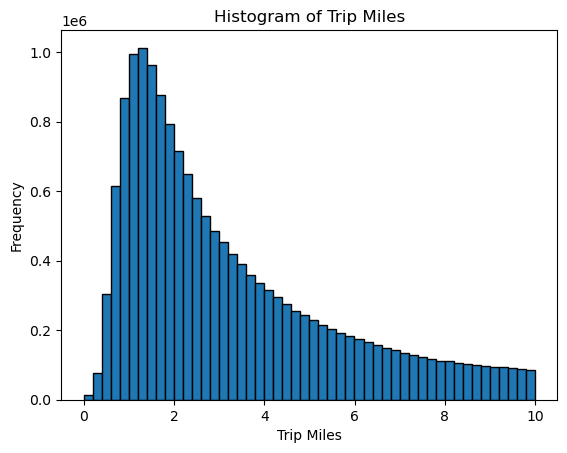

In [162]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(filtered_df, bins=50, edgecolor='black')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.show()
#trips become more frequent up until about a mile then get less and less frequent
# i wonder if most picukup and dropoff zones are the same